<a href="https://colab.research.google.com/github/Nourhan-Adell/DeepLearning/blob/main/Horse_Or_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I will use Image Data Generator to make this binary classification.

In [ ]:
# Install this package to use Colab's GPU for training
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 420 MB of archives.
After this operation, 3,369 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.4.1.50-1+cuda11.6 [420 MB]
Fetched 420 MB in 8s (51.9 MB/s)
(Reading database ... 155676 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155654 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.4.1.50-1+cuda11.6_amd64.deb ...
Unpacking libcudnn8 (8.4.1.50-1+c

# **Downloading the data**

In [ ]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip


--2022-08-22 17:21:34--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.128, 74.125.196.128, 142.251.162.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   115MB/s    in 1.2s    

2022-08-22 17:21:35 (115 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [22]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip


--2022-08-22 17:57:00--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.97.128, 142.251.107.128, 74.125.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.07s   

2022-08-22 17:57:00 (165 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [1]:
#Unzip the imported data:
# 1. Unzip the training set:
import zipfile
local_zip= '/content/horse-or-human.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

#2. Unzip the testing set:
local_zip= '/content/validation-horse-or-human.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [2]:
import os
#directory with training horse pictures
train_horse_dir= os.path.join('./horse-or-human/horses')

#directory with training human pictures
train_human_dir= os.path.join('./horse-or-human/humans')

#directory with validation horse pictures
validation_horse_dir= os.path.join('./validation-horse-or-human/horses')

#directory with validation human pictures
validation_human_dir= os.path.join('./validation-horse-or-human/humans')

In [3]:
train_horse_names= os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names= os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names= os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

validation_human_names= os.listdir(validation_human_dir)
print(validation_human_names[:10])  

['horse17-8.png', 'horse39-4.png', 'horse50-3.png', 'horse20-6.png', 'horse17-2.png', 'horse07-4.png', 'horse46-0.png', 'horse32-0.png', 'horse04-3.png', 'horse25-0.png']
['human01-16.png', 'human04-01.png', 'human09-18.png', 'human05-05.png', 'human12-12.png', 'human08-03.png', 'human09-17.png', 'human06-12.png', 'human05-02.png', 'human03-24.png']
['horse4-599.png', 'horse4-232.png', 'horse5-519.png', 'horse2-112.png', 'horse5-400.png', 'horse6-275.png', 'horse6-153.png', 'horse1-455.png', 'horse2-201.png', 'horse3-326.png']
['valhuman01-03.png', 'valhuman02-08.png', 'valhuman01-05.png', 'valhuman05-20.png', 'valhuman01-13.png', 'valhuman03-16.png', 'valhuman04-17.png', 'valhuman04-01.png', 'valhuman02-10.png', 'valhuman04-11.png']


In [4]:
print('total training horse images: ', len(os.listdir(train_horse_dir)))
print('total training human images: ', len(os.listdir(train_human_dir)))

print('total validation horse images: ', len(os.listdir(validation_horse_dir)))
print('total validation human images: ', len(os.listdir(validation_human_dir)))

total training horse images:  500
total training human images:  527
total validation horse images:  128
total validation human images:  128


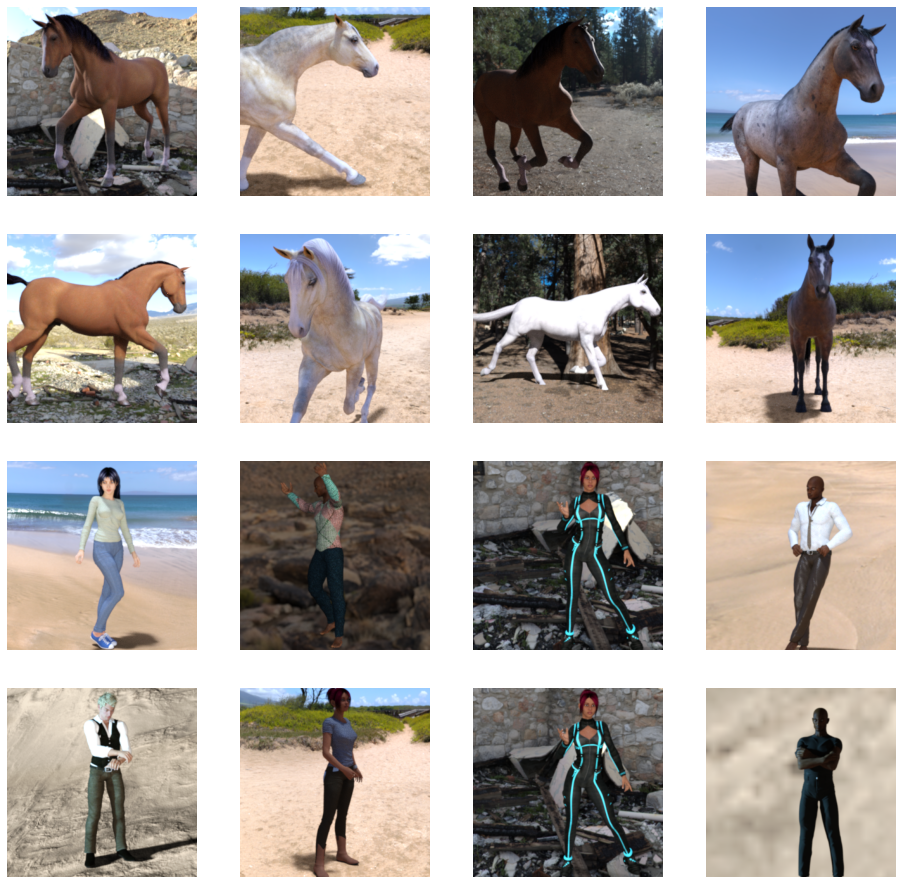

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  
#Parameters of the graph
ncols= 4
nrows= 4
pic_index=0   #indexing for iteration over the images

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index += 8

next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## **Building the Model:**

In [6]:
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files


In [7]:
from threading import active_count
model = tf.keras.Sequential([
    # First Convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPool2D(2,2),
    # Second Convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # Third Convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # Fourth Convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # Fifth Convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # Flatten the result
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Here we have alot of convolutions because the data is large (300, 300)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [9]:
from tensorflow.keras.optimizers import RMSprop   # RMSprop: allow us to tweak the learning rate
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics= ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## **Data Preprocessing**

In [13]:
#Rescalling the data
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory('./horse-or-human/',    # Train Directory
                                                    target_size=(300,300),  # resizing the images to 300x300
                                                    batch_size=128,
                                                    class_mode='binary')

# Flow training images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory('./validation-horse-or-human/',    # Train Directory
                                                    target_size=(300,300),  # resizing the images to 300x300
                                                    batch_size=32,
                                                    class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## **Train the Neural Network**

In [14]:
history = model.fit(train_generator,  #this stream the images from the training directory
                    steps_per_epoch= 8,  
                    epochs= 15,
                    verbose= 1,          #It specifies How much to display while training is going on 
                    validation_data = validation_generator,
                    validation_steps= 8)          

Epoch 1/15
8/8 [==============================] - 9s 1s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.1179 - val_accuracy: 0.8047
Epoch 2/15
8/8 [==============================] - 9s 1s/step - loss: 0.0185 - accuracy: 0.9933 - val_loss: 0.9564 - val_accuracy: 0.9141
Epoch 3/15
8/8 [==============================] - 8s 1s/step - loss: 0.1590 - accuracy: 0.9533 - val_loss: 2.6630 - val_accuracy: 0.7969
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 0.0178 - accuracy: 0.9956 - val_loss: 1.1786 - val_accuracy: 0.8867
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.3520 - val_accuracy: 0.8867
Epoch 6/15
8/8 [==============================] - 8s 1s/step - loss: 8.6301e-04 - accuracy: 1.0000 - val_loss: 1.8651 - val_accuracy: 0.8672
Epoch 7/15
8/8 [==============================] - 8s 1s/step - loss: 3.5996e-04 - accuracy: 1.0000 - val_loss: 1.8096 - val_accuracy: 0.8789
Epoch 8/15
8/8 [=================

Here, Each epoch will loading the data, calculating the convolutions and then trying to match the convolutions to labels.

## **Model Prediction**

In [18]:
uploaded= files.upload()      #It is related to colab where it will give me the botton to click and upload one or more image
for fn in uploaded.keys():
  path='/content/' + fn
  #load an image and prepare it to input into the model 
  img= image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images= np.vstack([x])
  #will use the model to make a prediction if a certain photo is a horse or a human
  classes= model.predict(images, batch_size=10)
  print(classes[0])


  if classes[0]>0.5:
    print(fn + 'is a human')
  else:
    print(fn + 'is a horse')

Saving horse-g7d5ebfbe7_640.jpg to horse-g7d5ebfbe7_640 (1).jpg
[0.]
horse-g7d5ebfbe7_640.jpgis a horse


## **Visualizing th Convolutions**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


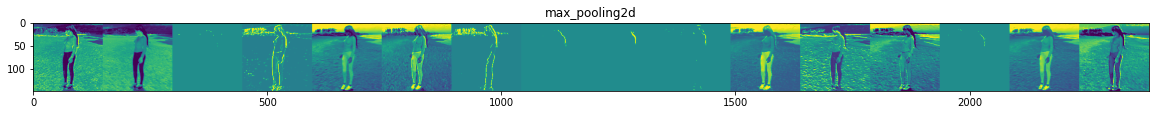

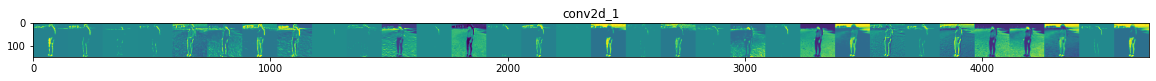

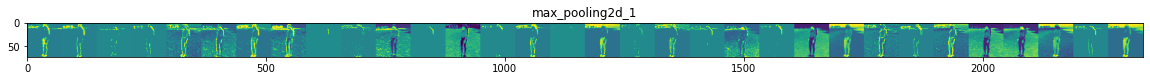

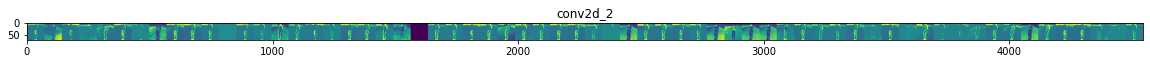

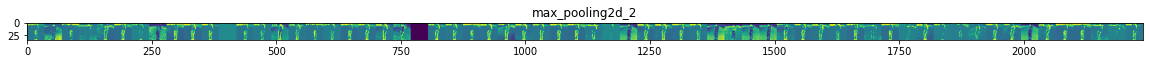

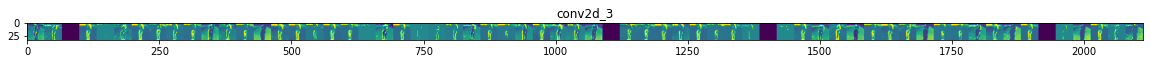

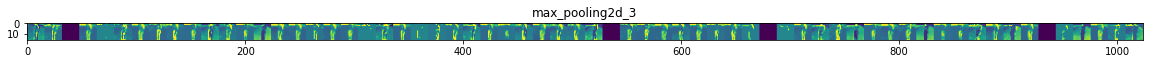

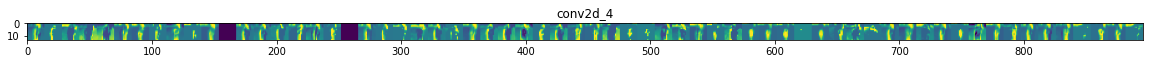

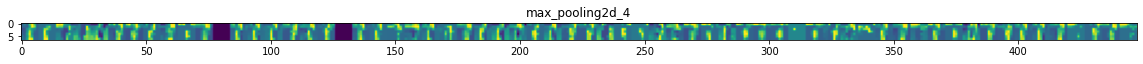

In [20]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## **Clean Up**
this code is to terminate the kernel and free memory resources

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)
